# Project: Investigate No Show Appointments Dataset.

# Table of Contents
* [Introduction](#introduction)
* [Data Wrangling](#data_wrangling)
    1. Discovering
    2. Structuring
    3. Cleaning
    4. Enriching
    5. Validating
    6. Publishing
* [Exploratory Data Analysis](#exploratory_data_analysis)
* [Conclusions](#conclusions)
    1. Results
    2. Limitations

# Introduction
through the invistigation of this dataset we are going to answer some very important quesions:

1. is patient gender associated with patient absence ?
2. is patient age associated with patient absence ?
3. is patient neighbourhood associated with patient absence ?
4. is patient with scholarship most likely to show ?
5. is patient without diabetes most likely to show ?
6. is alcoholic patient most likely to not show ?
7. is handicapped patient most likely to not show ?
8. is patient who received SMS most likely to show ?
9. is scheduled year,month,day or hour associated with patient absence ?
10. is appointment year,month or day associated with patient absence ?

first we need to include the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plot_assist import bar_plot,descrip_column,Proportion,pie_plot

# Data Wrangling

## 1. Discovering

we will load and distinguish the structure of our dataset 

In [2]:
df = pd.read_csv('resources/noshowappointments.csv')
print(df.columns)
print(df.shape)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')
(110527, 14)


now we will inspect each column characteristics

In [3]:
descrip_column(df['PatientId'])

name: PatientId
dtype: float64
null count: 0
unique: [2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13]
max range: 999981631772427.0
min range: 39217.84439
max frequncy: 88
min frequncy: 1


usually the id columns will not affect any other feature but since it's repetitive in this dataset we can extract some data from it like number of visits/appointments for each patient or if that patient has showed at all

In [4]:
np.sum(df['PatientId'].value_counts() <= 2)

51815

In [5]:
descrip_column(df['AppointmentID'])

name: AppointmentID
dtype: int64
null count: 0
unique: [5642903 5642503 5642549 ... 5630692 5630323 5629448]
max range: 5790484
min range: 5030230
max frequncy: 1
min frequncy: 1


here we can notic that the IDs is not repetitive and unique for each appointment and since it's irrelevent and not affecting any other feature we will drop it

we will implement that in the Cleaning step

In [6]:
descrip_column(df['Gender'])

name: Gender
dtype: object
null count: 0
unique: ['F' 'M']
max frequncy: 71840
min frequncy: 38687


we will not modifiy this column

In [7]:
descrip_column(df['ScheduledDay'])

name: ScheduledDay
dtype: object
null count: 0
unique: ['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']
max frequncy: 24
min frequncy: 1


this variable type is quantitative continuous with seconds as threshold but it can be discrete by segregating it into years, monthes, days and hours , neglecting minutes and seconds as it will not really affect our analysis. 

will impliment that in the Structuring step. 

we should also check for the range of each feature :

* monthes 1 - 12
* days 1 - 31
* hours 0 - 24


In [8]:
descrip_column(df['AppointmentDay'])

name: AppointmentDay
dtype: object
null count: 0
unique: ['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:00Z']
max frequncy: 4692
min frequncy: 39


same as ScheduledDay feature but here we can notice that hours,minutes and seconds are zeros so we will segregating it into years, monthes and days only

In [9]:
descrip_column(df['Age'])

name: Age
dtype: int64
null count: 0
unique: [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]
max range: 115
min range: -1
max frequncy: 3539
min frequncy: 1


we can notice here that the range of age should be >= 0, since we have -1 that makes no scence and we don't know what it should be we will drop any row with that value

will impliment that in the Cleaning step.

In [10]:
descrip_column(df['Neighbourhood'])

name: Neighbourhood
dtype: object
null count: 0
unique: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO'
 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA'
 'ILHA DO FRADE' 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO'
 'BOA VISTA' 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'
 'ENSEADA DO SUÁ' 'SANTOS REIS' 'PIEDADE' 'JESUS DE NAZARETH'
 'SANTA TE

we will not modifiy this column

In [11]:
descrip_column(df['Scholarship'])

name: Scholarship
dtype: int64
null count: 0
unique: [0 1]
max range: 1
min range: 0
max frequncy: 99666
min frequncy: 10861


we will not modifiy this column

In [12]:
descrip_column(df['Hipertension'])

name: Hipertension
dtype: int64
null count: 0
unique: [1 0]
max range: 1
min range: 0
max frequncy: 88726
min frequncy: 21801


we will not modifiy this column

In [13]:
descrip_column(df['Diabetes'])

name: Diabetes
dtype: int64
null count: 0
unique: [0 1]
max range: 1
min range: 0
max frequncy: 102584
min frequncy: 7943


we will not modifiy this column

In [14]:
descrip_column(df['Alcoholism'])

name: Alcoholism
dtype: int64
null count: 0
unique: [0 1]
max range: 1
min range: 0
max frequncy: 107167
min frequncy: 3360


we will not modify this column

In [15]:
descrip_column(df['Handcap'])

name: Handcap
dtype: int64
null count: 0
unique: [0 1 2 3 4]
max range: 4
min range: 0
max frequncy: 108286
min frequncy: 3


we will not modify this column

In [16]:
descrip_column(df['SMS_received']) 

name: SMS_received
dtype: int64
null count: 0
unique: [0 1]
max range: 1
min range: 0
max frequncy: 75045
min frequncy: 35482


we will not modify this column

In [17]:
descrip_column(df['No-show']) 

name: No-show
dtype: object
null count: 0
unique: ['No' 'Yes']
max frequncy: 88208
min frequncy: 22319


we will not modify this column

that concludes the following:
* PatientId and AppointmentID         

    catigorial nominal, this features is irrelvant and does not affect any other feature so we     will drop it in the cleaning step 
    
* Gender             

    catigorial with values: female or male

* ScheduledDay and AppointmentDay      

    quantitative continuous with seconds as threshold but it can be discrete by segregating it     into years, monthes, days and hours , neglecting minutes and seconds as it will not really     affect our analysis. will impliment that in the Structuring step.
    we should also check for the range of each feature :
    * monthes 1 - 12
    * days 1 - 31
    * hours 0 - 24

* Age                

    quantitative discrete as it in years
    we should also check for the range :
    * Age >= 0

* Neighbourhood      

    catigorial nominal

* Scholarship        

    catigorial nominal with values: 0,1

* Hipertension       

    catigorial nominal with values: 0,1

* Diabetes           

    catigorial nominal with values: 0,1

* Alcoholism         

    catigorial nominal with values: 0,1

* Handcap         

    catigorial ordinal with values: 0,1,2,3,4

* SMS_received       

    catigorial nominal with values: 0,1

* No-show            

    catigorial nominal with values: 'No','Yes'

## 2. Structuring

base on the results from the pervios step we need to segregate ScheduledDay feature into years,monthes, days and hours

In [18]:
datetime = pd.to_datetime(df['ScheduledDay'])
df['scheduled_year'] = datetime.dt.year
df['scheduled_month'] = datetime.dt.month
df['scheduled_day'] = datetime.dt.day
df['scheduled_hour'] = datetime.dt.hour

now we need to segregate AppointmentDay feature into years, monthes and days only
as hours,minutes and seconds are zeros as we mentiond in the pervios step

In [19]:
datetime = pd.to_datetime(df['AppointmentDay'])
df['appointment_year'] = datetime.dt.year
df['appointment_month'] = datetime.dt.month
df['appointment_day'] = datetime.dt.day
print((datetime.dt.hour == 0).all())
print((datetime.dt.minute == 0).all())
print((datetime.dt.second == 0).all())

True
True
True


## 3. Cleaning

we will drop ScheduledDay and AppointmentDay columns as they already segregated and no longer needed, also we gonna drop AppointmentID as it irrelevent as mentiond earlier

In [20]:
df.drop(['ScheduledDay','AppointmentDay','AppointmentID'], axis=1, inplace=True)

now we will eleminate all the rows with age < 0 as mentiond earlier

In [21]:
df = df[df['Age'] >= 0]

## 4. Enriching

in this step i will try to Enrich the data by adding latitude and longitude of the cities (as it may relate to other features) from other dataset

In [22]:
extra = pd.read_csv('resources/BRAZIL_CITIES.csv', sep=";", decimal=",")
extra.rename(columns=lambda x: x.upper(), inplace=True)
extra['CITY'] = extra['CITY'].apply(lambda x: x.upper())
idx = np.array(list(set(extra['CITY']) & set(df['Neighbourhood'])))

df['LONG'] = None
df['LAT'] = None
for i in idx:
    df.loc[df['Neighbourhood'] == i,'LONG'] = extra['LONG'][extra['CITY'] == i].values[0]
    df.loc[df['Neighbourhood'] == i,'LAT'] = extra['LAT'][extra['CITY'] == i].values[0]

print(df['LONG'].isnull().sum())


80277


unfortunatly not all cities are available in the loaded dataset and that causes a lot of missing data so we gonna drop the new columns

In [23]:
df.drop(['LONG','LAT'], axis=1, inplace=True)

## 5. Validating

we will skip this step as no need for validation

## 6. Publishing

before saving our data we gonna change all columns to lower case to ease of use later 

In [24]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [25]:
df.to_csv('resources/noshowappointments_clean.csv', index=False)

# Exploratory Data Analysis

we want to test how every feature affect no-show feature

In [26]:
df.columns

Index(['patientid', 'gender', 'age', 'neighbourhood', 'scholarship',
       'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received',
       'no-show', 'scheduled_year', 'scheduled_month', 'scheduled_day',
       'scheduled_hour', 'appointment_year', 'appointment_month',
       'appointment_day'],
      dtype='object')

## is patient gender associated with patient absence ?

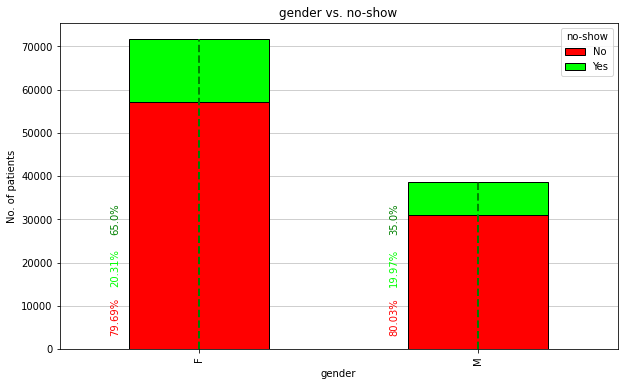

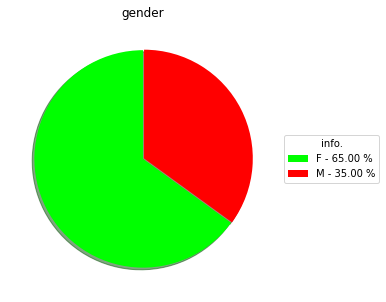

In [27]:
bar_plot(df,'gender','no-show',ylabel='No. of patients')
pie_plot(df['gender'])

clearly we can notic that the percentage of males that didn't show approximately equal the percentage of females that didn't show (80.03% ≈ 79.69%) even if females represents approximately 2/3 of the sample

that concludes that gender does not affect no-show

## is patient age associated with patient absence ?

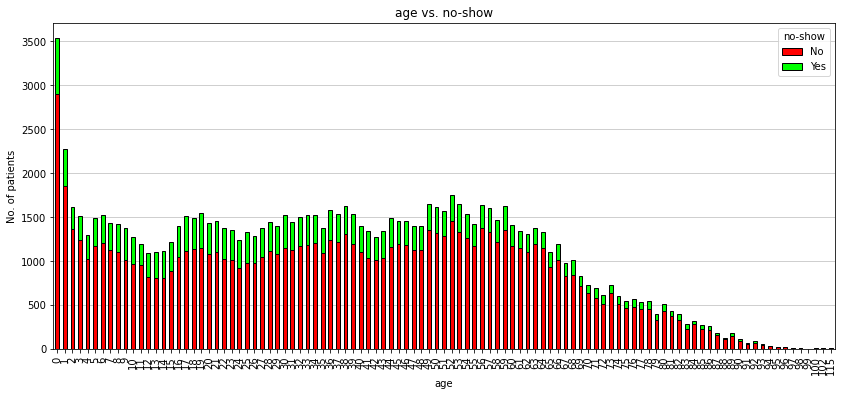

In [28]:
bar_plot(df,'age','no-show',ylabel='No. of patients',percentages=False,figsize = (14,6))

In [29]:
Proportion(df,'age','no-show')

no-show,No,Yes,total
age,,,
0,81.94,18.06,3.20
1,81.74,18.26,2.06
2,84.43,15.57,1.46
3,81.69,18.31,1.37
4,78.29,21.71,1.18
...,...,...,...
98,83.33,16.67,0.01
99,100.00,0.00,0.00
100,100.00,0.00,0.00


we can conclude few points from that plot:

1. newborn patients have the highest percentage of setting an appointment amoung all ages
2. percentage of patients that didn't show through all ages are very close, that concludes that patient age does not affect no show feature

## is patient neighbourhood associated with patient absence ?

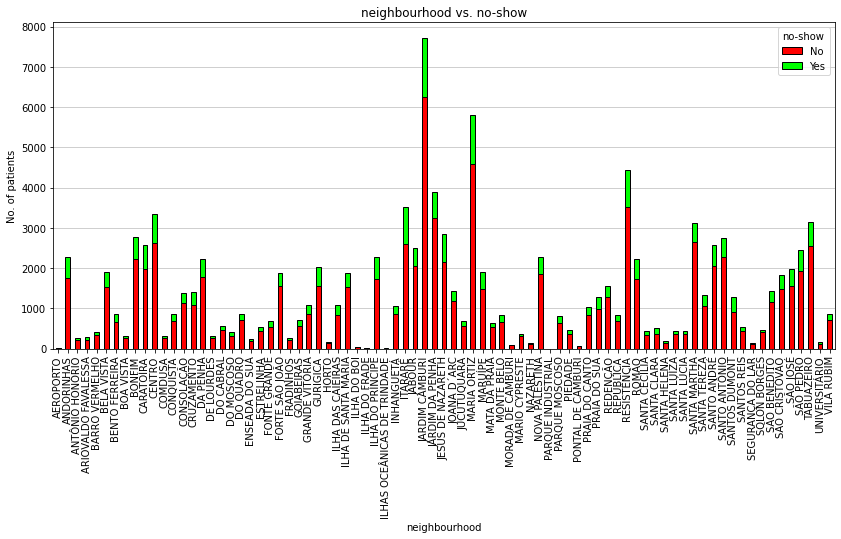

In [30]:
bar_plot(df,'neighbourhood','no-show',ylabel='No. of patients',percentages=False,figsize = (14,6))

In [31]:
Proportion(df,'neighbourhood','no-show')

no-show,No,Yes,total
neighbourhood,,,
AEROPORTO,87.50,12.50,0.01
ANDORINHAS,76.97,23.03,2.05
ANTÔNIO HONÓRIO,81.55,18.45,0.25
ARIOVALDO FAVALESSA,78.01,21.99,0.26
BARRO VERMELHO,78.49,21.51,0.38
...,...,...,...
SÃO JOSÉ,78.35,21.65,1.79
SÃO PEDRO,78.96,21.04,2.21
TABUAZEIRO,81.70,18.30,2.83


if we could get the location or climate of the cities instead of names maybe we could have promising results.

in general the percentage of patients that didn't show through all neighbourhood are very close, that concludes that neighbourhood does not affect no show feature

## is patient with scholarship most likely to show ?

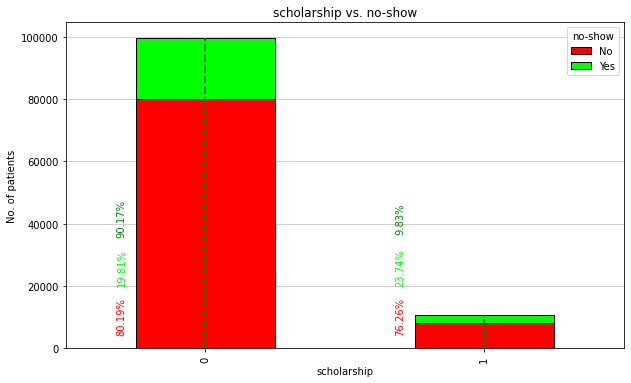

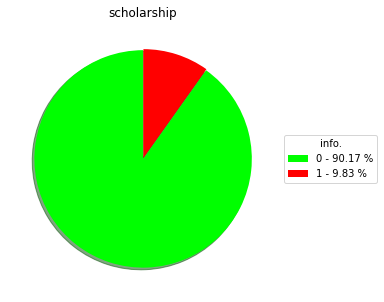

In [32]:
bar_plot(df,'scholarship','no-show',ylabel='No. of patients')
pie_plot(df['scholarship'])

althoug the deffrence in the percentage of the patients with scholarship and who is without is huge in this sample (90.17% to 9.83%), the percentages of who didn't show is approximately equal (80.19% ≈ 76.26%)

that concludes that scholarship does not affect no-show 

## is patient without diabetes most likely to show ?

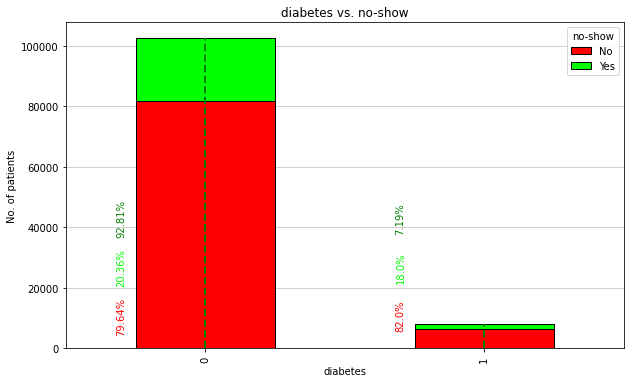

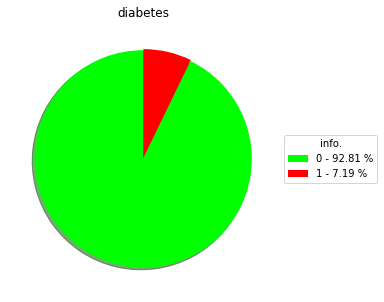

In [33]:
bar_plot(df,'diabetes','no-show',ylabel='No. of patients')
pie_plot(df['diabetes'])

the percentages of patients without diabetes that didn't show and patients with diabetes that didn't show is approximately equal (79.64% ≈ 82.0%)

that concludes that diabetes feature does not affect no-show feature

## is alcoholic patient most likely to not show ?

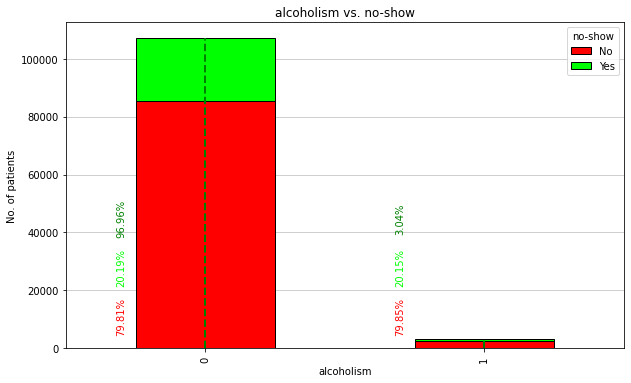

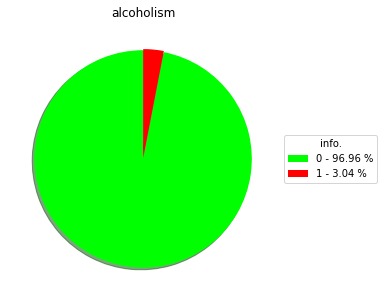

In [34]:
bar_plot(df,'alcoholism','no-show',ylabel='No. of patients')
pie_plot(df['alcoholism'])

the percentages of patients without alcoholism that didn't show and patients with alcoholism that didn't show is approximately equal (79.81% ≈ 79.85%)

that concludes that alcoholism feature does not affect no-show feature

## is handicapped patient most likely to not show ?

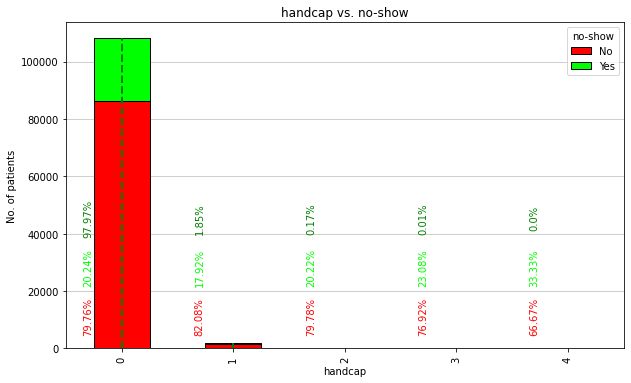

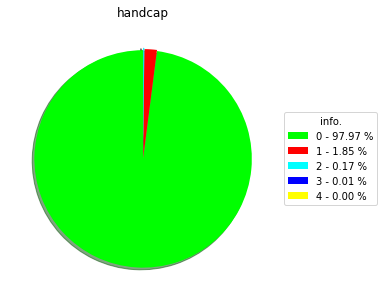

In [35]:
bar_plot(df,'handcap','no-show',ylabel='No. of patients')
pie_plot(df['handcap'])

here we can see that numeber of patients dicrease with numeber of handcap increase althuogh the pecentages of patients that didn't show is approximately fixed (79.76% ≈ 82.08% ≈ 79.78% ≈ 76.92% ≈ 66.67%)

that concludes that handcap feature does not affect no-show feature

## is patient who received SMS most likely to show ?

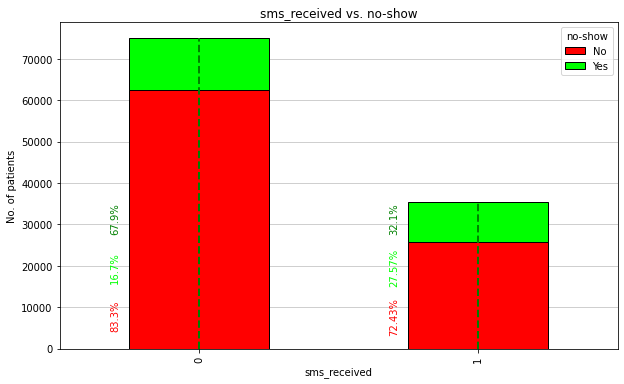

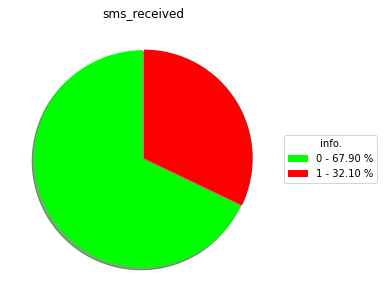

In [36]:
bar_plot(df,'sms_received','no-show',ylabel='No. of patients')
pie_plot(df['sms_received'])

the percentages of patients that didn't receive SMS and didn't show and patients received SMS that didn't show is approximately equal (83.3% ≈ 72.43%)

## is scheduled year associated with patient absence ?

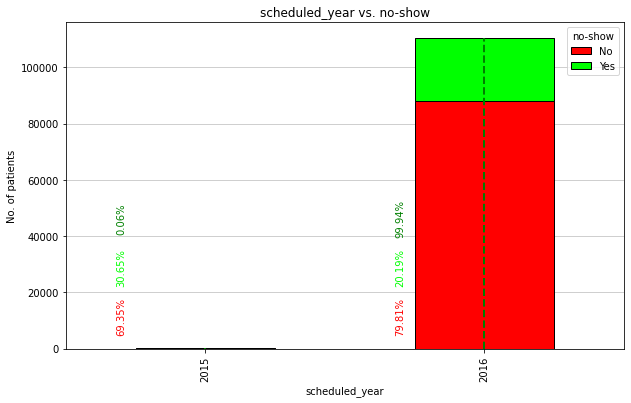

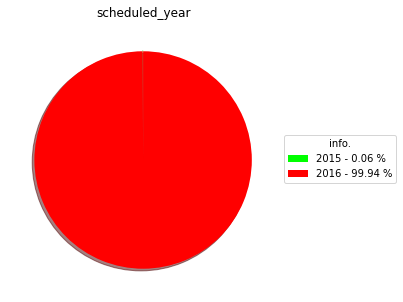

In [37]:
bar_plot(df,'scheduled_year','no-show',ylabel='No. of patients')
pie_plot(df['scheduled_year'])

althoug the scheduling started at late 2015 and we don't have enough data abuot that year but the percentage of patients that didn't show between 2015 and 2016 are very close 69.35%, 79.81%

that concludes that year also doesn't affect no show feature

## is scheduled month associated with patient absence ?

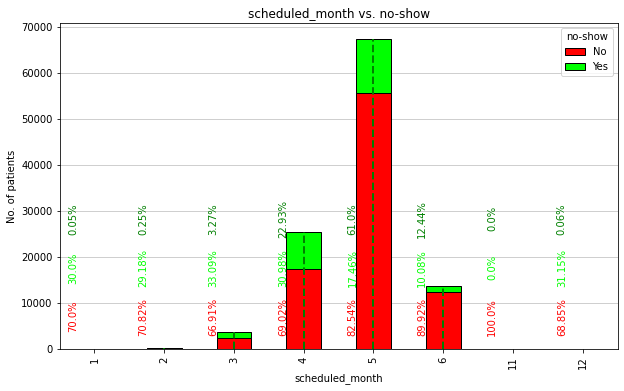

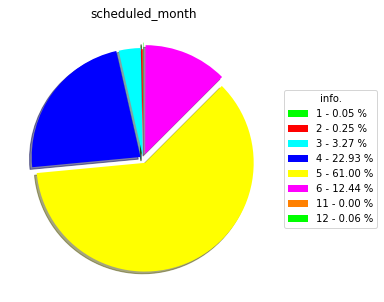

In [38]:
bar_plot(df,'scheduled_month','no-show',ylabel='No. of patients')
pie_plot(df['scheduled_month'])

we can conclude few points from that plot:

1. the monthes 7,8,9 and 10 does not include any patients
2. the 5th month is the most crowded month
3. percentage of patients that didn't show through all monthes are very close, that concludes that scheduled month does not affect no show feature

## is scheduled day associated with patient absence ?

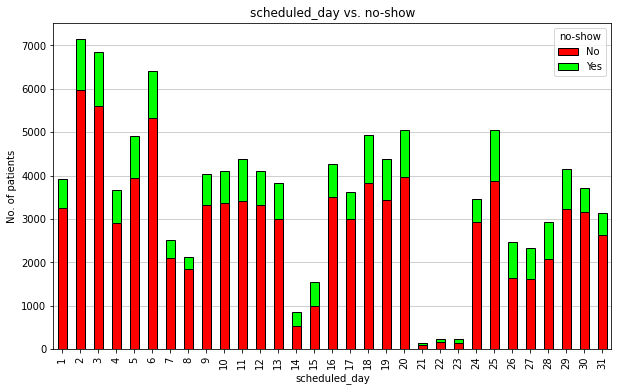

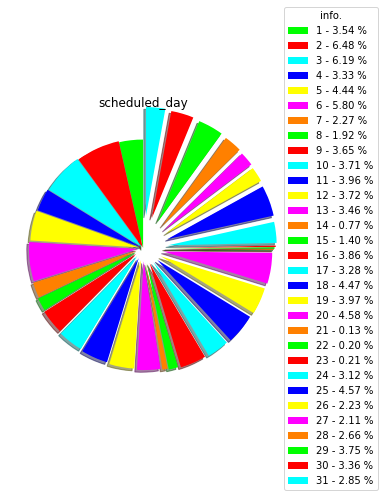

In [39]:
bar_plot(df,'scheduled_day','no-show',percentages=False,ylabel='No. of patients')
pie_plot(df['scheduled_day'])

In [40]:
Proportion(df,'scheduled_day','no-show')

no-show,No,Yes,total
scheduled_day,,,
1,82.94,17.06,3.54
2,83.52,16.48,6.48
3,81.92,18.08,6.19
4,79.08,20.92,3.33
5,80.58,19.42,4.44
6,83.15,16.85,5.80
7,83.73,16.27,2.27
8,87.35,12.65,1.92
9,82.53,17.47,3.65


we can conclude few points from that plot:

1. the days 21,22 and 23 are the least crowded days of the month
2. percentage of patients that didn't show through all days are very close, that concludes that scheduled day does not affect no show feature

## is scheduled hour associated with patient absence ?

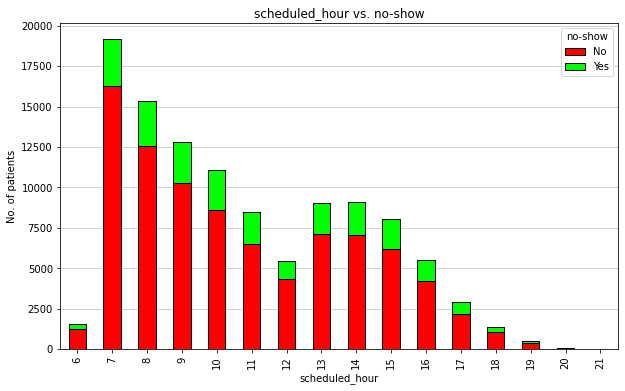

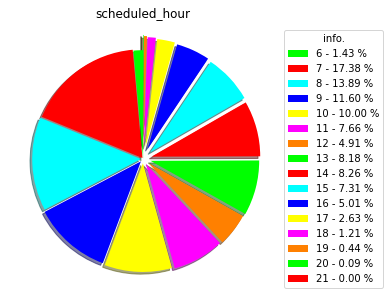

In [41]:
bar_plot(df,'scheduled_hour','no-show',percentages=False,ylabel='No. of patients')
pie_plot(df['scheduled_hour'])

In [42]:
Proportion(df,'scheduled_hour','no-show')

no-show,No,Yes,total
scheduled_hour,,,
6,80.80,19.20,1.43
7,84.85,15.15,17.38
8,81.73,18.27,13.89
9,80.30,19.70,11.60
10,77.93,22.07,10.00
11,77.22,22.78,7.66
12,79.64,20.36,4.91
13,79.07,20.93,8.18
14,77.32,22.68,8.26


we can conclude few points from that plot:

1. the day shift starts at 6 AM and ends at 9 PM
2. percentage of patients that didn't show through all hours are very close, that concludes that scheduled hour does not affect no show feature

## is appointment year associated with patient absence ?

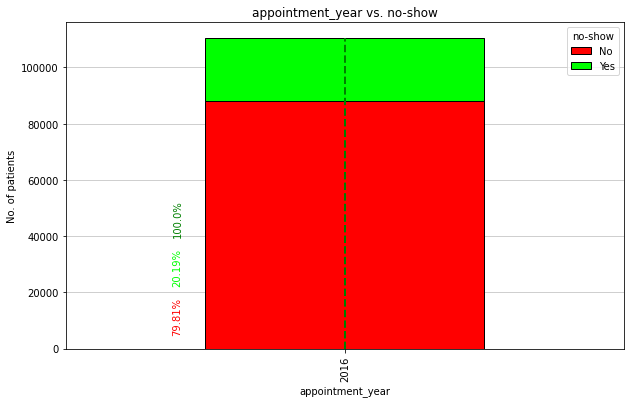

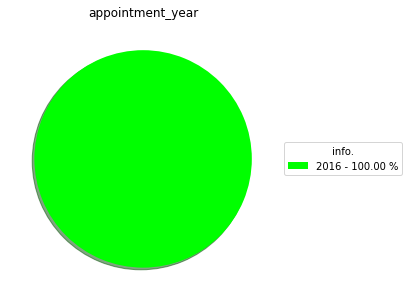

In [43]:
bar_plot(df,'appointment_year','no-show',ylabel='No. of patients')
pie_plot(df['appointment_year'])

the plot concludes that the dataset is for the year 2016 only and the total pecentage of patients that didn't show 79.81 during that year

## is appointment month associated with patient absence ?

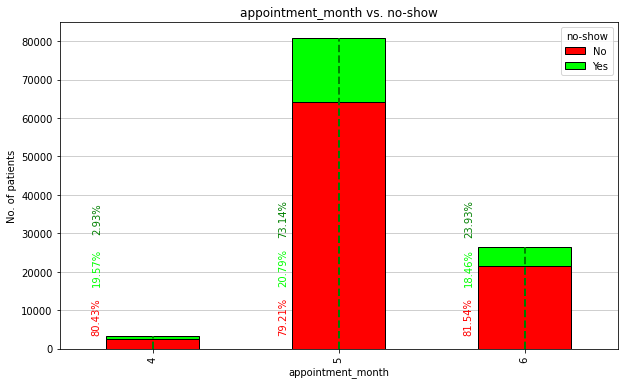

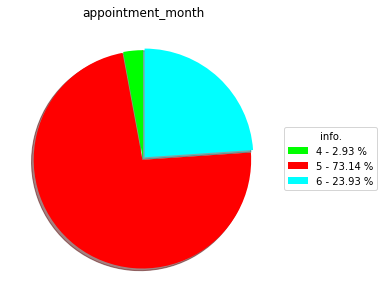

In [44]:
bar_plot(df,'appointment_month','no-show',ylabel='No. of patients')
pie_plot(df['appointment_month'])

we can conclude few points from that plot:

1. the appoinments are set for only three monthes 4,5 and 6
2. the 5th month is the most crowded month
3. percentage of patients that didn't show through all monthes are very close, that concludes that appointment month does not affect no show feature

## is appointment day associated with patient absence ?

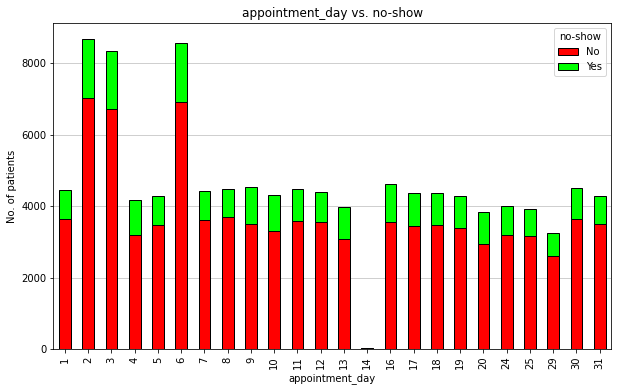

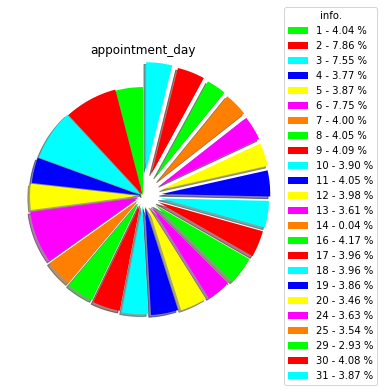

In [45]:
bar_plot(df,'appointment_day','no-show',percentages=False,ylabel='No. of patients')
pie_plot(df['appointment_day'])

In [46]:
Proportion(df,'appointment_day','no-show')

no-show,No,Yes,total
appointment_day,,,
1,81.81,18.19,4.04
2,80.85,19.15,7.86
3,80.40,19.60,7.55
4,76.66,23.34,3.77
5,81.11,18.89,3.87
6,80.54,19.46,7.75
7,81.52,18.48,4.00
8,82.72,17.28,4.05
9,77.46,22.54,4.09


we can conclude few points from that plot:

1. the day 14 are the least crowded days of the month
2. percentage of patients that didn't show through all days are very close, that concludes that appointment day does not affect no show feature

# Conclusions
## 1. Results
* it's hard to tell which feature are affecting whether a patient is gonna show for the appointment or not as all features gives very close percentages when ploted against no show feature. maybe an additonal features has different opinion only if we could implement that through enriching our dataset.
i will try to implement that in future once i found a decent enriching source.

## 2. Limitations
* the variables are eather catigorial or quantitative discrete which prevents performing numerical or arithmetic operations or finding correlation between variables.

* there is variables that may really affect patient's absence such cities locations and climate or patients distnces from medical centers and availability of decent transportation which is not included.
